CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

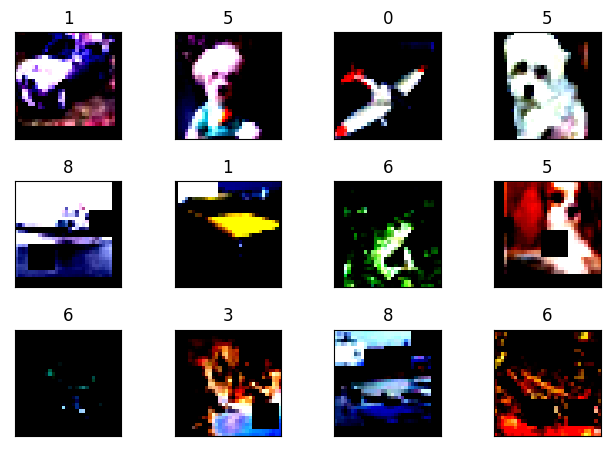

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

cuda = torch.cuda.is_available()

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("CUDA Available?", cuda)

# let us consider this as classes though they are not 
class_map = {
    'ZERO': 0,
    'ONE': 1,
    'TWO': 2,
    'THREE': 3,
    'FOUR': 4,
    'FIVE': 5,
    'SIX': 6,
    'SEVEN': 7,
    'EIGHT': 8,
    'NINE': 9
}
batch_size = 512

from dataloader import get_dataloader

train_loader, test_loader = get_dataloader()

from utils import return_dataset_images

return_dataset_images(train_loader, 12)

In [2]:
!pip install torchsummary
from model import Net, train, test, model_summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = Net().to(device)
model_summary(model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

In [4]:
!pip install torch_lr_finder

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 6.04E-02


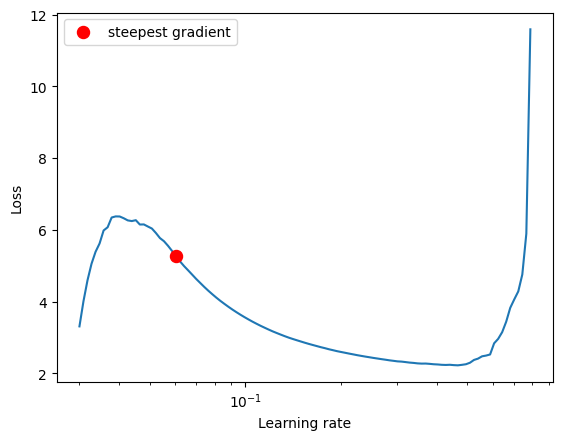

In [3]:
from find_LR import find_lr

optimizer = optim.Adam(model.parameters(), lr=0.03, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

max_lr = find_lr(model,optimizer, criterion, device,train_loader)

In [4]:
from one_cycle_lr import get_onecycle_scheduler

num_epochs = 24

scheduler = get_onecycle_scheduler(optimizer,max_lr,train_loader,num_epochs)

for epoch in range(1, num_epochs+1):
  # print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion,scheduler)
  test(model, device, test_loader)
  # scheduler.step()

Loss=1.1711978912353516 Batch_id=97 Accuracy=45.83: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]



Test set: Average loss: 0.0045, Accuracy: 3985/10000 (39.85%)



Loss=1.0448131561279297 Batch_id=97 Accuracy=60.43: 100%|██████████| 98/98 [00:21<00:00,  4.51it/s]



Test set: Average loss: 0.0024, Accuracy: 6237/10000 (62.37%)



Loss=0.7570374608039856 Batch_id=97 Accuracy=68.83: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]



Test set: Average loss: 0.0018, Accuracy: 6943/10000 (69.43%)



Loss=0.7815639972686768 Batch_id=97 Accuracy=71.77: 100%|██████████| 98/98 [00:20<00:00,  4.78it/s]



Test set: Average loss: 0.0018, Accuracy: 7015/10000 (70.15%)



Loss=0.7272055745124817 Batch_id=97 Accuracy=73.29: 100%|██████████| 98/98 [00:20<00:00,  4.73it/s]



Test set: Average loss: 0.0021, Accuracy: 6750/10000 (67.50%)



Loss=0.8125055432319641 Batch_id=97 Accuracy=73.61: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]



Test set: Average loss: 0.0018, Accuracy: 6948/10000 (69.48%)



Loss=0.7253584861755371 Batch_id=97 Accuracy=74.33: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]



Test set: Average loss: 0.0017, Accuracy: 6982/10000 (69.82%)



Loss=0.7895308136940002 Batch_id=97 Accuracy=75.45: 100%|██████████| 98/98 [00:20<00:00,  4.87it/s]



Test set: Average loss: 0.0035, Accuracy: 5458/10000 (54.58%)



Loss=0.8703235387802124 Batch_id=97 Accuracy=75.53: 100%|██████████| 98/98 [00:20<00:00,  4.88it/s]



Test set: Average loss: 0.0017, Accuracy: 6995/10000 (69.95%)



Loss=0.8076187968254089 Batch_id=97 Accuracy=76.50: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]



Test set: Average loss: 0.0014, Accuracy: 7533/10000 (75.33%)



Loss=0.7076467275619507 Batch_id=97 Accuracy=76.46: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]



Test set: Average loss: 0.0015, Accuracy: 7480/10000 (74.80%)



Loss=0.6892431974411011 Batch_id=97 Accuracy=77.51: 100%|██████████| 98/98 [00:19<00:00,  4.92it/s]



Test set: Average loss: 0.0017, Accuracy: 7223/10000 (72.23%)



Loss=0.6508668065071106 Batch_id=97 Accuracy=77.95: 100%|██████████| 98/98 [00:20<00:00,  4.87it/s]



Test set: Average loss: 0.0016, Accuracy: 7287/10000 (72.87%)



Loss=0.6505520939826965 Batch_id=97 Accuracy=78.02: 100%|██████████| 98/98 [00:19<00:00,  4.92it/s]



Test set: Average loss: 0.0018, Accuracy: 7286/10000 (72.86%)



Loss=0.5282869935035706 Batch_id=97 Accuracy=79.27: 100%|██████████| 98/98 [00:20<00:00,  4.87it/s]



Test set: Average loss: 0.0020, Accuracy: 6968/10000 (69.68%)



Loss=0.5358166098594666 Batch_id=97 Accuracy=79.52: 100%|██████████| 98/98 [00:19<00:00,  4.93it/s]



Test set: Average loss: 0.0015, Accuracy: 7609/10000 (76.09%)



Loss=0.6075289845466614 Batch_id=97 Accuracy=80.71: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]



Test set: Average loss: 0.0013, Accuracy: 7862/10000 (78.62%)



Loss=0.4439188241958618 Batch_id=97 Accuracy=81.99: 100%|██████████| 98/98 [00:19<00:00,  4.94it/s]



Test set: Average loss: 0.0012, Accuracy: 8098/10000 (80.98%)



Loss=0.4684106707572937 Batch_id=97 Accuracy=82.72: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]



Test set: Average loss: 0.0009, Accuracy: 8413/10000 (84.13%)



Loss=0.46005979180336 Batch_id=97 Accuracy=83.86: 100%|██████████| 98/98 [00:19<00:00,  4.94it/s]



Test set: Average loss: 0.0009, Accuracy: 8405/10000 (84.05%)



Loss=0.4348575174808502 Batch_id=97 Accuracy=85.45: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]



Test set: Average loss: 0.0008, Accuracy: 8627/10000 (86.27%)



Loss=0.2646806538105011 Batch_id=97 Accuracy=87.21: 100%|██████████| 98/98 [00:19<00:00,  4.95it/s]



Test set: Average loss: 0.0008, Accuracy: 8718/10000 (87.18%)



Loss=0.30146583914756775 Batch_id=97 Accuracy=89.49: 100%|██████████| 98/98 [00:20<00:00,  4.87it/s]



Test set: Average loss: 0.0007, Accuracy: 8892/10000 (88.92%)



Loss=0.23946626484394073 Batch_id=97 Accuracy=91.65: 100%|██████████| 98/98 [00:19<00:00,  4.93it/s]



Test set: Average loss: 0.0006, Accuracy: 8981/10000 (89.81%)



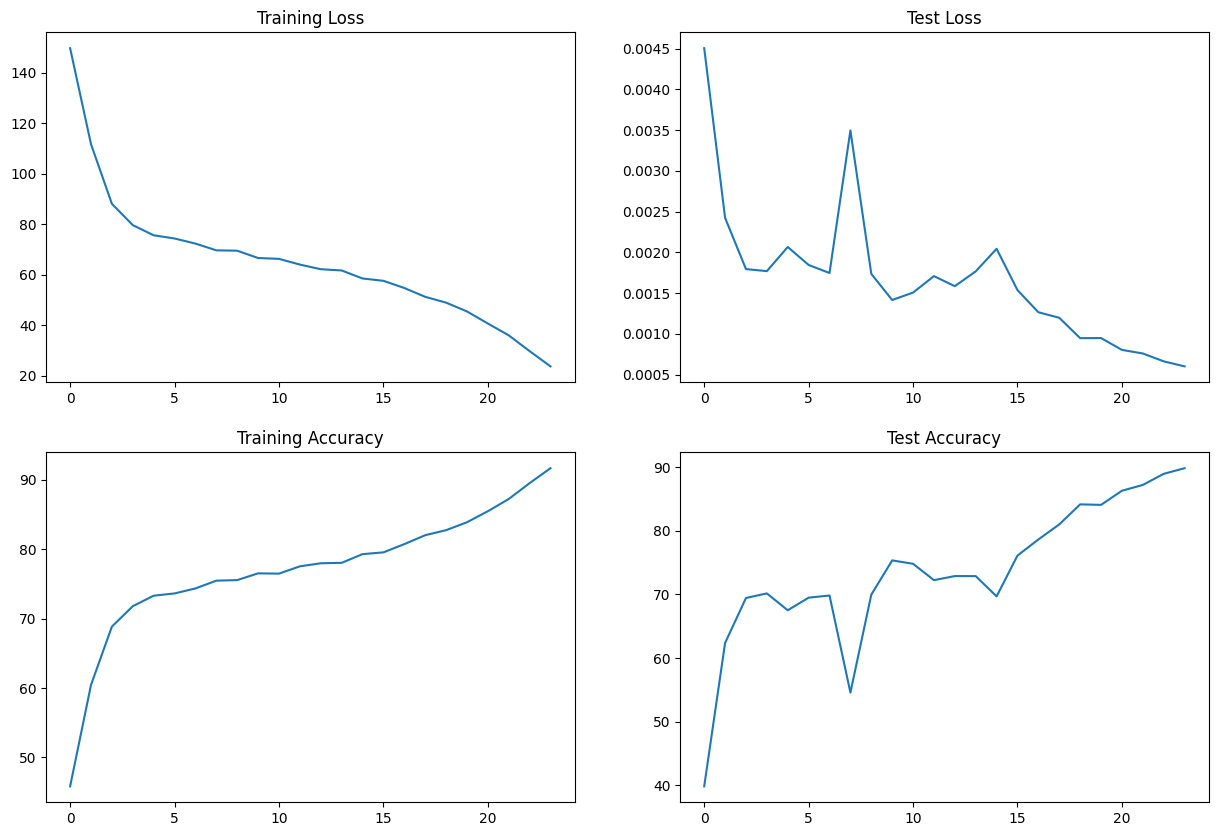

In [5]:
from model import draw_graphs
draw_graphs()

In [6]:
from utils import get_incorrrect_predictions, plot_incorrect_predictions

Total Incorrect Predictions 1019


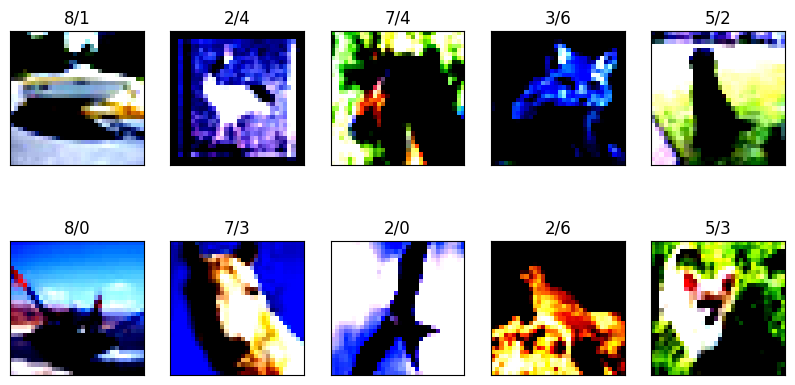

In [7]:
incorrect = get_incorrrect_predictions(model, test_loader, device)
plot_incorrect_predictions(incorrect, class_map)